In [1]:
from DataLoader import train_df
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from model_utils import find_bad_zeros,find_bad_building1099,trim_site

train = train_df(build_meta_csv='./heat_data/building_metadata.csv',
                train_csv='./heat_data/train.csv',
                weather_train_csv='./heat_data/weather_train.csv',
                merge=True,
                datetime=True,
                unmerged=False,
                encode_and_scale=False,
                drop=False)
train.head(10)

Memory usage of properties dataframe is : 616.9464874267578  MB
******************************
Column:  building_id
dtype before:  int64
min for this col:  0
max for this col:  1448
dtype after:  uint16
******************************
******************************
Column:  meter
dtype before:  int64
min for this col:  0
max for this col:  3
dtype after:  uint8
******************************
******************************
Column:  meter_reading
dtype before:  float64
min for this col:  0.0
max for this col:  21904700.0
dtype after:  float32
******************************
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  289.1937065124512  MB
This is  46.875006569639226 % of the initial size


,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,year,month,day,weekday,hour
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,...,20.0,NaN,1019.7,0.0,0.0,2016,1,1,4,0
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,...,20.0,NaN,1019.7,0.0,0.0,2016,1,1,4,0
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,...,20.0,NaN,1019.7,0.0,0.0,2016,1,1,4,0
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,...,20.0,NaN,1019.7,0.0,0.0,2016,1,1,4,0
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,...,20.0,NaN,1019.7,0.0,0.0,2016,1,1,4,0
5,5,0,2016-01-01,0.0,0,Education,8000,2000.0,NaN,25.0,...,20.0,NaN,1019.7,0.0,0.0,2016,1,1,4,0
6,6,0,2016-01-01,0.0,0,Lodging/residential,27926,1981.0,NaN,25.0,...,20.0,NaN,1019.7,0.0,0.0,2016,1,1,4,0
7,7,0,2016-01-01,0.0,0,Education,121074,1989.0,NaN,25.0,...,20.0,NaN,1019.7,0.0,0.0,2016,1,1,4,0
8,8,0,2016-01-01,0.0,0,Education,60809,2003.0,NaN,25.0,...,20.0,NaN,1019.7,0.0,0.0,2016,1,1,4,0
9,9,0,2016-01-01,0.0,0,Office,27000,2010.0,NaN,25.0,...,20.0,NaN,1019.7,0.0,0.0,2016,1,1,4,0


Text(0.5, 1.0, 'Energy consuming by usage')

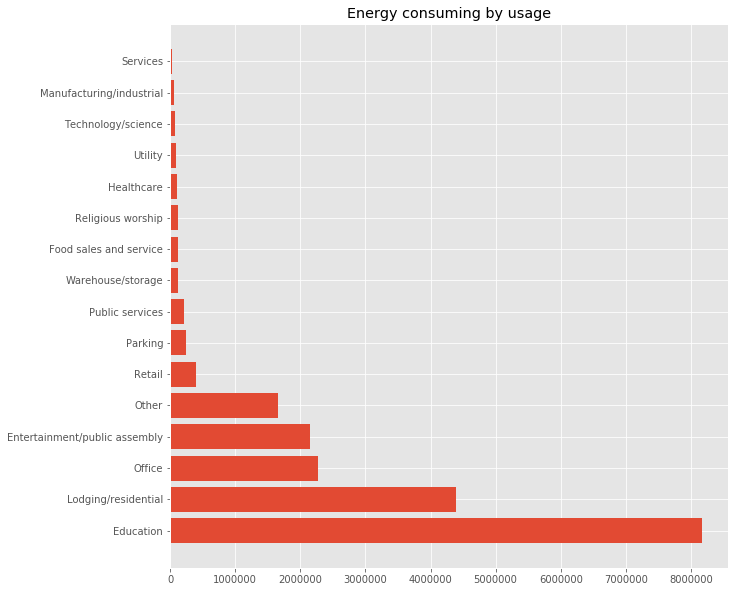

In [2]:
plt.figure(figsize=(10,10)) 
plt.style.use('ggplot')
plt.barh(train['primary_use'].unique(),train['primary_use'].value_counts())
plt.title("Energy consuming by usage")

Text(0.5, 1.0, 'Nan Values per feature in percentage')

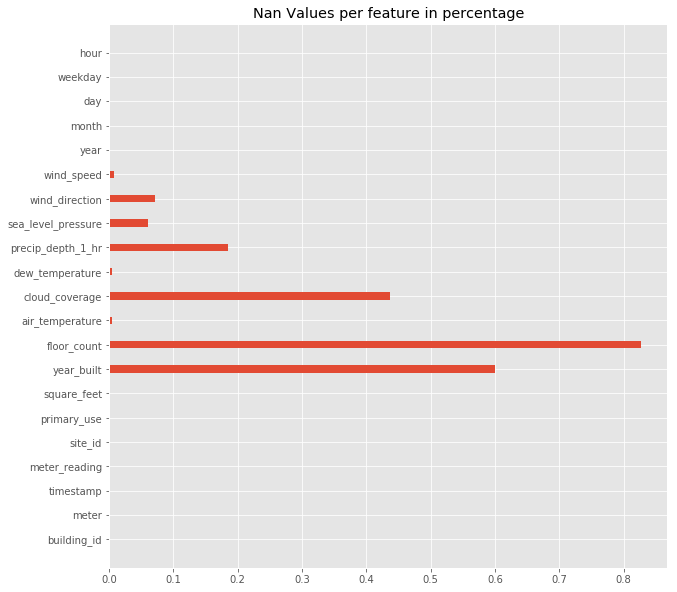

In [3]:
plt.figure(figsize=(10,10)) 
plt.barh(train.columns,1-train.count()/len(train),height=0.3)
plt.title("Nan Values per feature in percentage")

In [4]:
train.groupby(['primary_use']).mean() 

,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,year,month,day,weekday,hour
primary_use,,,,,,,,,,,,,,,,,,,
Education,746.121543,0.725243,4585.091797,7.250374,119998.782690,1965.134652,5.244270,16.389896,1.751527,7.839122,0.749801,1015.822101,172.126689,3.293366,2016.0,6.577650,6.577650,3.007513,11.503462
Entertainment/public assembly,785.745215,0.562833,473.880676,7.567959,106256.004265,1972.320638,2.093724,17.141617,1.905298,8.661881,0.774980,1016.215361,169.010892,3.317165,2016.0,6.583554,6.583554,3.006282,11.499468
Food sales and service,833.948567,1.077746,304.908020,9.227662,39635.179683,2012.000000,NaN,17.231262,1.450976,4.748834,0.539749,1014.486924,174.577342,3.193493,2016.0,6.512183,6.512183,3.008888,11.499947
Healthcare,1093.571025,0.859126,738.597595,11.641382,138438.671365,1976.620568,1.000000,13.303335,1.472606,5.582175,0.747271,1016.294189,186.147621,3.449965,2016.0,6.526265,6.526265,3.008662,11.500977
Lodging/residential,792.114507,0.686112,279.710449,7.911639,100830.731729,1971.736636,6.382590,17.022129,1.525080,8.624589,0.870181,1016.211196,163.342689,3.096081,2016.0,6.640940,6.640940,3.007259,11.501769
Manufacturing/industrial,1110.334373,0.591164,285.897003,11.785822,42169.498739,1954.658646,1.666667,10.316037,2.087295,4.927790,1.084794,1016.211945,189.301182,4.163711,2016.0,6.656957,6.656957,3.007263,11.499909
Office,927.903717,0.760413,526.504395,9.910898,96837.479905,1968.976549,3.850769,14.353253,1.904571,6.519680,0.826446,1016.010615,176.929349,3.519290,2016.0,6.576973,6.576973,3.006587,11.502728
Other,705.195775,0.166137,138.703781,6.678865,29122.550755,1981.266629,1.067732,17.479227,2.500229,10.310253,1.030056,1017.253911,170.831573,3.581307,2016.0,6.508831,6.508831,3.005986,11.501172
Parking,601.612879,0.205415,169.386795,6.094108,287217.872594,2000.621274,3.125795,16.741951,2.731570,8.718301,0.900291,1016.246225,174.895730,3.718891,2016.0,6.569534,6.569534,3.008452,11.500225


In [5]:
pd.pivot_table(train,index='primary_use',values='meter_reading',columns=['meter'],aggfunc=[np.mean,np.std,np.max,np.min])

mean                             \
meter                                   0            1             2   
primary_use                                                            
Education                      245.430573   736.632568  30607.160156   
Entertainment/public assembly  116.197159  1526.434570    615.157715   
Food sales and service          94.794983   372.636536    911.671631   
Healthcare                     297.179199   869.034424   1726.272095   
Lodging/residential            108.596275   417.783478    742.800110   
Manufacturing/industrial        90.659195   301.235992    774.807922   
Office                         157.500946   283.246521   2305.234131   
Other                           69.385201   733.031616    267.810486   
Parking                         58.575775    10.233912   1431.267212   
Public services                 98.712631   476.721954   2728.422852   
Religious worship                4.592755     8.051415           NaN   
Retail                         138.683212   146.403763           NaN   
Services                        92.203720          NaN  22185.125000   
Technology/science             107.892624   138.134888    132.241013   
Utility                        169.304688  1375.784912    751.839600   
Warehouse/storage               51.562508          NaN     87.217010   

                                                   std                \
meter                                    3           0             1   
primary_use                                                            
Education                       300.172577  528.657776   3696.645020   
Entertainment/public assembly  1300.619019  228.875854  25431.919922   
Food sales and service           86.811447   70.614830    703.860413   
Healthcare                      355.678192  410.555878   1292.446167   
Lodging/residential              57.460217  141.579254    909.204285   
Manufacturing/industrial               NaN   91.842690    265.740479   
Office                          245.048431  296.313599    575.502441   
Other                                  NaN  212.028091   1155.261963   
Parking                                NaN   53.307838     11.272155   
Public services                 434.909210  189.953049    712.019104   
Religious worship                      NaN    3.422867      5.088786   
Retail                                 NaN  343.273926    189.371124   
Services                               NaN   68.462784           NaN   
Technology/science              299.821991   55.282196    215.356277   
Utility                                NaN  279.265594    961.719849   
Warehouse/storage                      NaN   59.450607           NaN   

                                                                   amax  \
meter                                      2            3             0   
primary_use                                                               
Education                      645372.812500  1015.932068  79769.000000   
Entertainment/public assembly    1111.743774  7139.008789  11624.000000   
Food sales and service            749.092102   125.320259    374.066010   
Healthcare                       2267.901855   608.882996   2225.280029   
Lodging/residential              2088.170410    93.936035  12571.000000   
Manufacturing/industrial          781.833008          NaN    380.600006   
Office                           8289.390625   405.326263  44336.500000   
Other                             270.032532          NaN   2770.000000   
Parking                          1991.889771          NaN    354.385986   
Public services                  4540.274902   625.740295   3895.000000   
Religious worship                        NaN          NaN     17.680000   
Retail                                   NaN          NaN   3202.000000   
Services                        27882.857422          NaN    653.661011   
Technology/science                 90.470070   496.623230    328.559998   
Utility                 

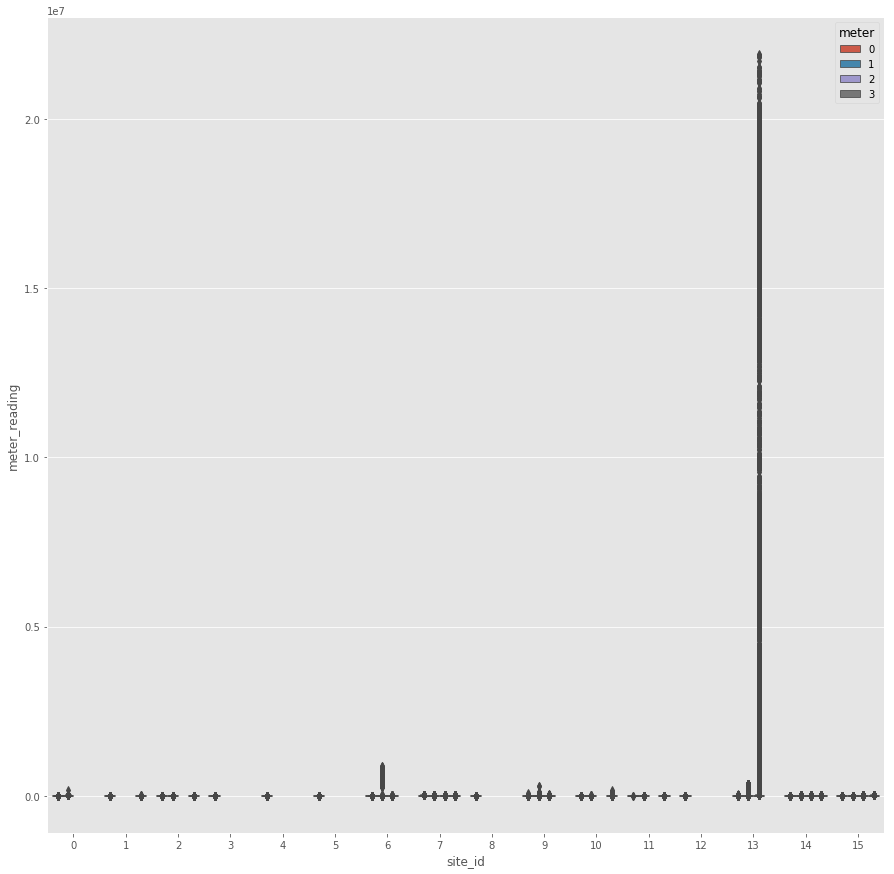

In [6]:
plt.figure(figsize=(15,15))
sns.boxplot(x=train['site_id'],y=train['meter_reading'],hue=train['meter'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

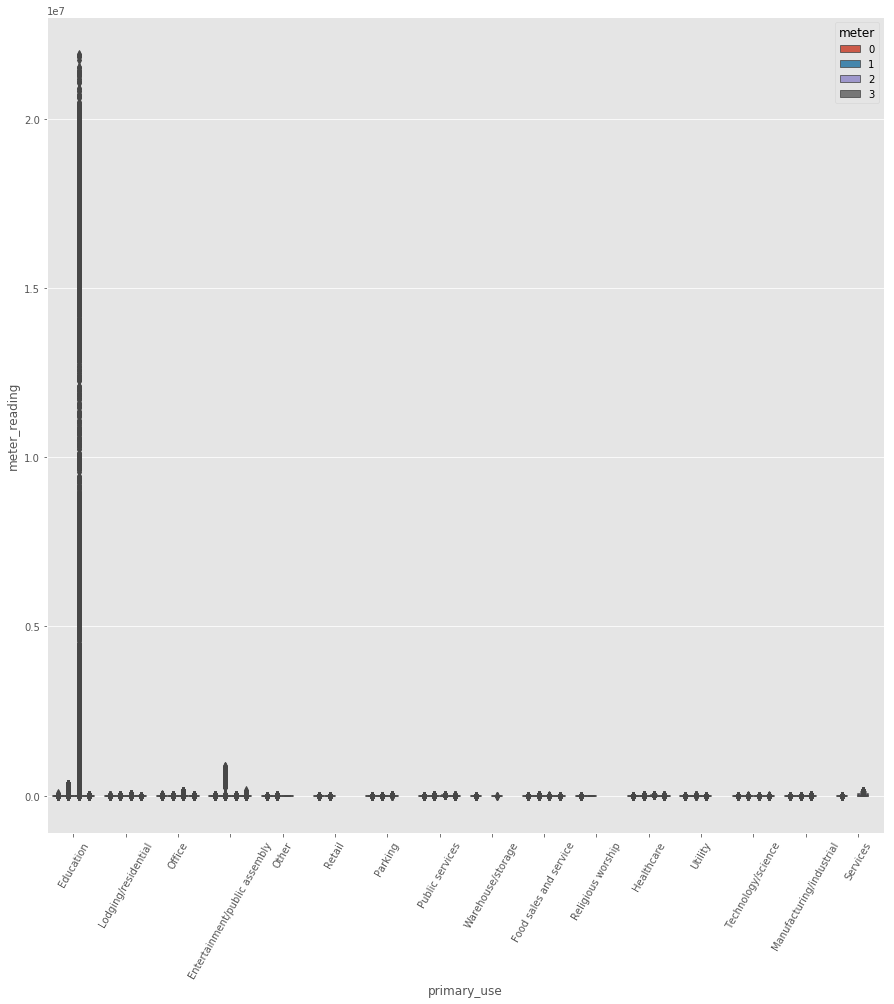

In [7]:
plt.figure(figsize=(15,15))
sns.boxplot(x='primary_use',y='meter_reading',data=train,hue='meter')
plt.xticks(rotation=60)

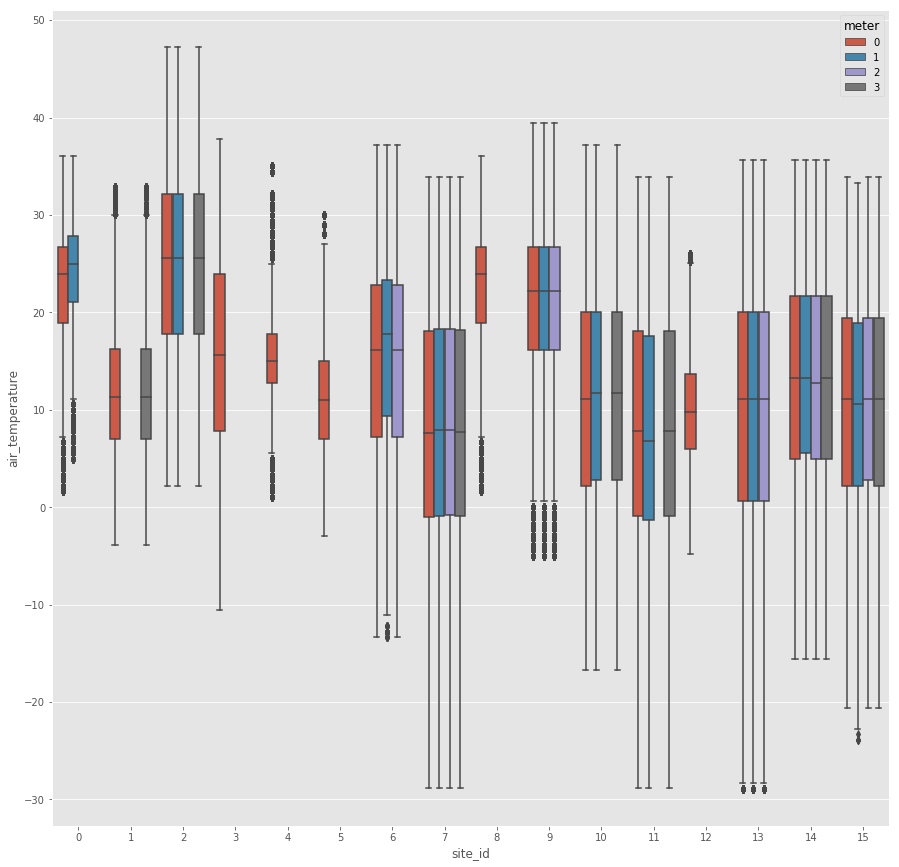

In [8]:
plt.figure(figsize=(15,15))
sns.boxplot(x=train['site_id'],y=train['air_temperature'],hue=train['meter'])

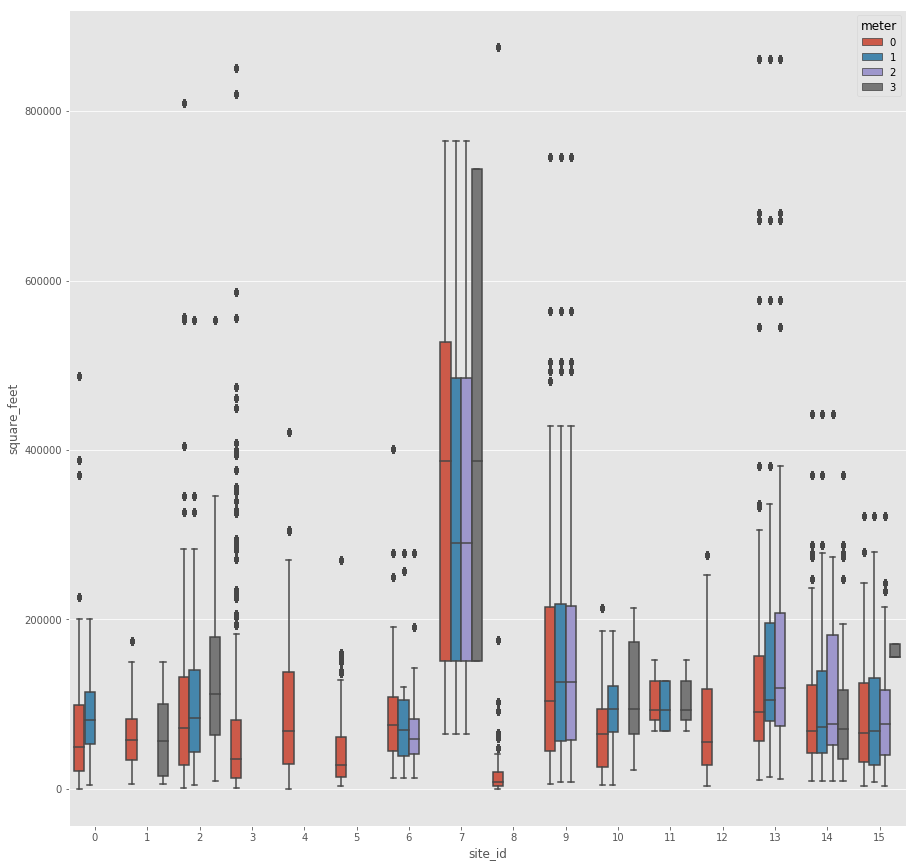

In [9]:
plt.figure(figsize=(15,15))
sns.boxplot(x=train['site_id'],y=train['square_feet'],hue=train['meter'])

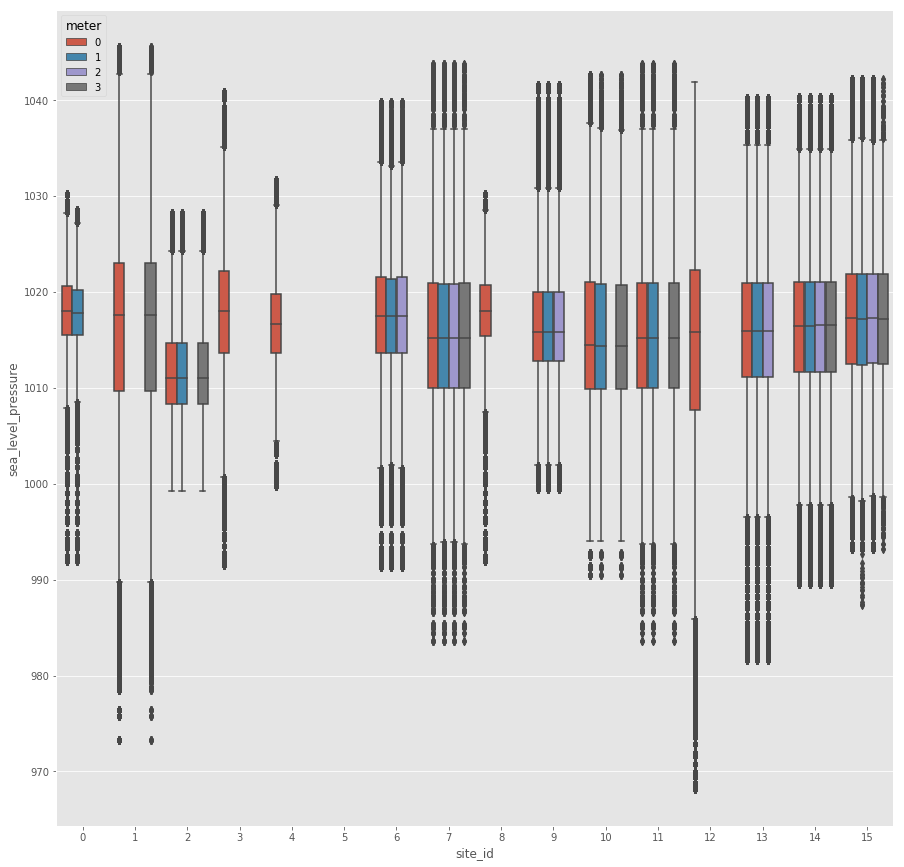

In [10]:
plt.figure(figsize=(15,15))
sns.boxplot(x=train['site_id'],y=train['sea_level_pressure'],hue=train['meter'])

In [11]:
site = train.loc[train['site_id'] == 13]
pd.pivot_table(site,index='primary_use',columns='meter',values='meter_reading',aggfunc=[np.max,np.min])

amax                               \
meter                                     0              1             2   
primary_use                                                                
Education                       8894.000000  356640.000000  2.190470e+07   
Entertainment/public assembly   1691.000000    3717.179932  1.870580e+04   
Food sales and service           133.912003            NaN  3.011720e+03   
Healthcare                       434.696991    3330.169922  2.818950e+04   
Lodging/residential              669.065002    1380.109985  4.540920e+04   
Manufacturing/industrial         373.934998            NaN  4.203120e+03   
Office                         44336.500000    7278.419922  1.316250e+05   
Other                             76.699997            NaN  1.003910e+03   
Parking                          354.385986      78.406097  1.153580e+04   
Public services                 2402.689941   12656.299805  2.985350e+04   
Services                         653.661011            NaN  1.292500e+05   
Technology/science               328.000000            NaN           NaN   
Warehouse/storage                 45.070999            NaN  4.643560e+02   

                                 amin                
meter                               0    1        2  
primary_use                                          
Education                       0.000  0.0   0.0000  
Entertainment/public assembly   0.000  0.0   0.0000  
Food sales and service         18.393  NaN  11.7187  
Healthcare                      0.000  0.0   0.0000  
Lodging/residential             0.000  0.0   0.0000  
Manufacturing/industrial        0.000  NaN   0.0000  
Office                          0.000  0.0   0.0000  
Other                           0.000  NaN   0.0000  
Parking                         0.000  0.0   0.0000  
Public services                 0.000  0.0   0.0000  
Services                        0.000  NaN   0.0000  
Technology/science              0.000  NaN      NaN  
Warehouse/storage               0.000  NaN   0.0000

In [12]:
train.groupby(['meter']).apply(lambda x: x.isna().sum())

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,year,month,day,weekday,hour
meter,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,6470035,9096083,47325,...,49091,2513679,1018383,678715,66795,0,0,0,0,0
1,0,0,0,0,0,0,0,2819559,3972549,23502,...,24341,541565,105047,402544,37330,0,0,0,0,0
2,0,0,0,0,0,0,0,2141016,2604116,22832,...,23487,506216,93784,310063,34174,0,0,0,0,0
3,0,0,0,0,0,0,0,697035,1036419,2999,...,3221,187563,14455,57726,5377,0,0,0,0,0


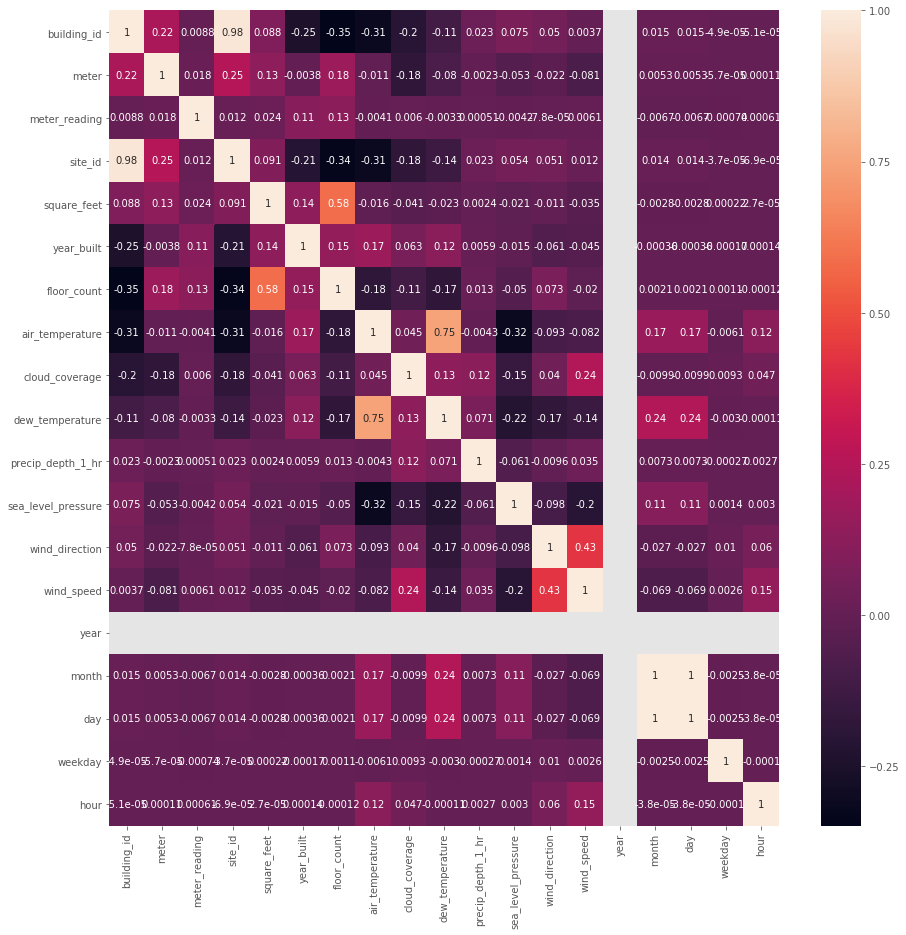

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(method='pearson'),annot=True)

In [14]:
train.groupby(['building_id','meter','primary_use',]).apply(lambda x: x.isna().sum()).head(10)

building_id  meter  timestamp  \
building_id meter primary_use                                          
0           0     Education                      0      0          0   
1           0     Education                      0      0          0   
2           0     Education                      0      0          0   
3           0     Education                      0      0          0   
4           0     Education                      0      0          0   
5           0     Education                      0      0          0   
6           0     Lodging/residential            0      0          0   
7           0     Education                      0      0          0   
            1     Education                      0      0          0   
8           0     Education                      0      0          0   

                                       meter_reading  site_id  primary_use  \
building_id meter primary_use                                                
0           0     Education                        0        0            0   
1           0     Education                        0        0            0   
2           0     Education                        0        0            0   
3           0     Education                        0        0            0   
4           0     Education                        0        0            0   
5           0     Education                        0        0            0   
6           0     Lodging/residential              0        0            0   
7           0     Education                        0        0            0   
            1     Education                        0        0            0   
8           0     Education                        0        0            0   

                                       square_feet  year_built  floor_count  \
building_id meter primary_use                                                 
0           0     Education                      0           0         8784   
1           0     Education                      0           0         8784   
2           0     Education                      0           0         8784   
3           0     Education                      0           0         8784   
4           0     Education                      0           0         8784   
5           0     Education                      0           0         8784   
6           0     Lodging/residential            0           0         8784   
7           0     Education                      0           0         8784   
            1     Education                      0           0         7267   
8           0     Education                      0           0         8784   

                                       air_temperature  ...  dew_temperature  \
building_id meter primary_use                           ...                    
0           0     Education                          3  ...                3   
1           0     Education                          3  ...                3   
2           0     Education                          3  ...                3   
3           0     Education                          3  ...                3   
4           0     Education                          3  ...                3   
5           0     Education                          3  ...                3   
6           0     Lodging/residential                3  ...                3   
7           0     Education                          3  ...                3   
            1     Education                          0  ...                0   
8           0     Education                          3  ...                3   

                                       precip_depth_1_hr  sea_level_pressure  \
building_id meter primary_use                                                  
0           0     Education                            1                  85   
1           0     Education                            1                  85   
2      

In [15]:
building_1099 = find_bad_building1099(train,train['meter_reading'])
bad_zeros = find_bad_zeros(train,train['meter_reading'])

In [16]:
train = train.drop(building_1099)
train = train.drop(bad_zeros)

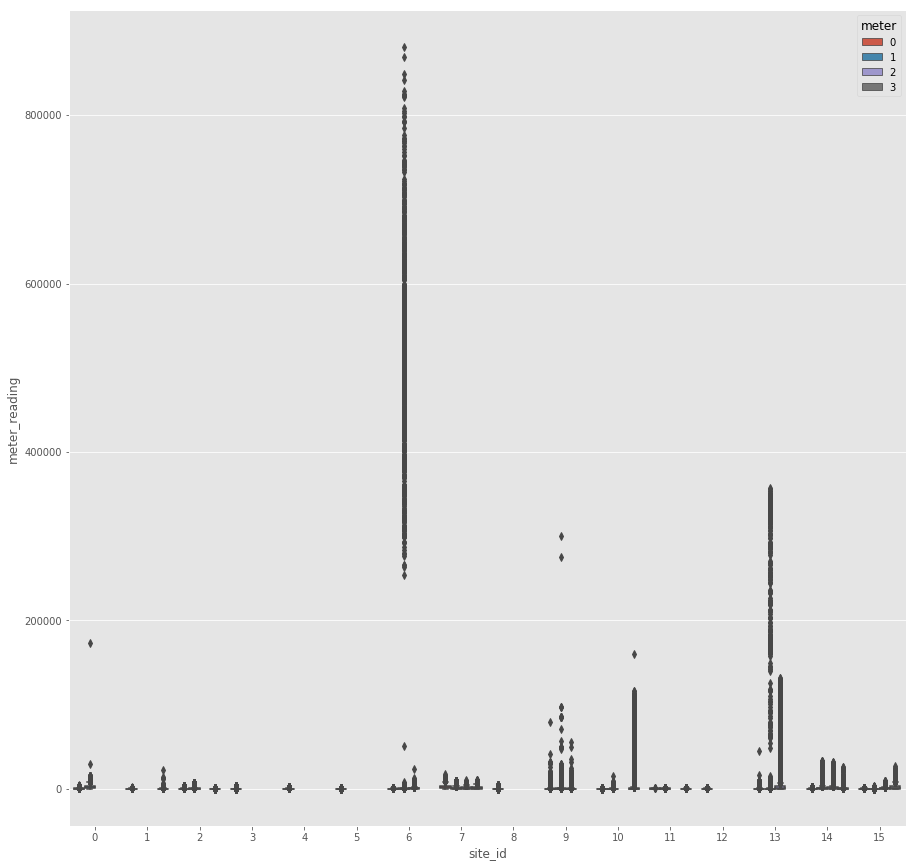

In [17]:
plt.figure(figsize=(15,15))
sns.boxplot(x=train['site_id'],y=train['meter_reading'],hue=train['meter'])

In [18]:
pd.pivot_table(train,index='primary_use',columns='site_id',values='meter_reading',aggfunc=[np.max]) 

amax                             \
site_id                                   0             1            2    
primary_use                                                               
Education                      172611.000000  22700.000000  6363.919922   
Entertainment/public assembly    3289.000000    137.750000  2848.750000   
Food sales and service                   NaN           NaN  6895.629883   
Healthcare                               NaN           NaN   287.079987   
Lodging/residential             13380.700195    304.738007  3257.939941   
Manufacturing/industrial                 NaN           NaN          NaN   
Office                           5571.770020  12100.000000  3724.909912   
Other                            4952.379883           NaN          NaN   
Parking                           325.000000           NaN   116.980003   
Public services                          NaN    600.000000  1081.329956   
Religious worship                        NaN           NaN     5.350000   
Retail                           3202.000000           NaN   342.295013   
Services                                 NaN           NaN          NaN   
Technology/science                       NaN           NaN          NaN   
Utility                                  NaN           NaN  5541.890137   
Warehouse/storage                        NaN           NaN   237.119995   

                                                                     \
site_id                                 3            4           5    
primary_use                                                           
Education                      2109.000000  2293.879883  324.500000   
Entertainment/public assembly   405.920013  1105.599976  954.099976   
Food sales and service                 NaN          NaN         NaN   
Healthcare                     2225.280029          NaN   50.000000   
Lodging/residential             658.390015   287.000000   12.300000   
Manufacturing/industrial               NaN          NaN  380.600006   
Office                         3095.439941          NaN  909.799988   
Other                           487.630005          NaN   57.799999   
Parking                          54.660000    55.883999         NaN   
Public services                2384.159912   421.500000  145.199997   
Religious worship                17.680000          NaN         NaN   
Retail                          197.330002          NaN         NaN   
Services                               NaN          NaN         NaN   
Technology/science                     NaN   132.750000         NaN   
Utility                                NaN    65.042503         NaN   
Warehouse/storage               375.269989          NaN         NaN   

                                                                         \
site_id                                   6             7            8    
primary_use                                                               
Education                        7675.560059  17502.099609          NaN   
Entertainment/public assembly  880374.000000           NaN  4373.169922   
Food sales and service                   NaN           NaN          NaN   
Healthcare                               NaN           NaN          NaN   
Lodging/residential              4979.580078           NaN          NaN   
Manufacturing/industrial                 NaN           NaN          NaN   
Office                          23836.599609           NaN   837.166992   
Other                                    NaN           NaN   110.833000   
Parking                                  NaN           NaN          NaN   
Public services                   639.354980           NaN   370.833008   
Religious worship                        NaN           NaN          NaN   
Retail                                   NaN           NaN          NaN   
Services                                 NaN           NaN          NaN   
Technology/science                       NaN           NaN      

In [19]:
train = trim_site(train)

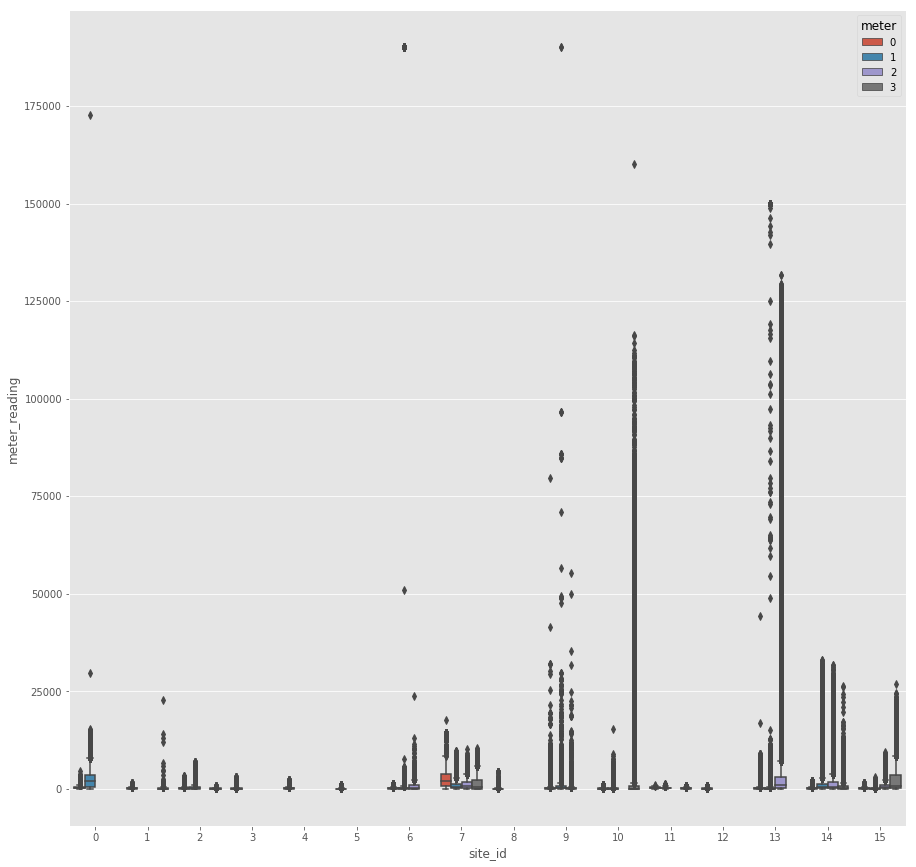

In [20]:
plt.figure(figsize=(15,15))
sns.boxplot(x=train['site_id'],y=train['meter_reading'],hue=train['meter'])

In [21]:
pd.pivot_table(train,index='primary_use',columns='site_id',values='meter_reading',aggfunc=[np.max]) 

amax                             \
site_id                                   0             1            2    
primary_use                                                               
Education                      172611.000000  22700.000000  6363.919922   
Entertainment/public assembly    3289.000000    137.750000  2848.750000   
Food sales and service                   NaN           NaN  6895.629883   
Healthcare                               NaN           NaN   287.079987   
Lodging/residential             13380.700195    304.738007  3257.939941   
Manufacturing/industrial                 NaN           NaN          NaN   
Office                           5571.770020  12100.000000  3724.909912   
Other                            4952.379883           NaN          NaN   
Parking                           325.000000           NaN   116.980003   
Public services                          NaN    600.000000  1081.329956   
Religious worship                        NaN           NaN     5.350000   
Retail                           3202.000000           NaN   342.295013   
Services                                 NaN           NaN          NaN   
Technology/science                       NaN           NaN          NaN   
Utility                                  NaN           NaN  5541.890137   
Warehouse/storage                        NaN           NaN   237.119995   

                                                                     \
site_id                                 3            4           5    
primary_use                                                           
Education                      2109.000000  2293.879883  324.500000   
Entertainment/public assembly   405.920013  1105.599976  954.099976   
Food sales and service                 NaN          NaN         NaN   
Healthcare                     2225.280029          NaN   50.000000   
Lodging/residential             658.390015   287.000000   12.300000   
Manufacturing/industrial               NaN          NaN  380.600006   
Office                         3095.439941          NaN  909.799988   
Other                           487.630005          NaN   57.799999   
Parking                          54.660000    55.883999         NaN   
Public services                2384.159912   421.500000  145.199997   
Religious worship                17.680000          NaN         NaN   
Retail                          197.330002          NaN         NaN   
Services                               NaN          NaN         NaN   
Technology/science                     NaN   132.750000         NaN   
Utility                                NaN    65.042503         NaN   
Warehouse/storage               375.269989          NaN         NaN   

                                                                         \
site_id                                   6             7            8    
primary_use                                                               
Education                        7675.560059  17502.099609          NaN   
Entertainment/public assembly  190000.000000           NaN  4373.169922   
Food sales and service                   NaN           NaN          NaN   
Healthcare                               NaN           NaN          NaN   
Lodging/residential              4979.580078           NaN          NaN   
Manufacturing/industrial                 NaN           NaN          NaN   
Office                          23836.599609           NaN   837.166992   
Other                                    NaN           NaN   110.833000   
Parking                                  NaN           NaN          NaN   
Public services                   639.354980           NaN   370.833008   
Religious worship                        NaN           NaN          NaN   
Retail                                   NaN           NaN          NaN   
Services                                 NaN           NaN          NaN   
Technology/science                       NaN           NaN      

In [22]:
train['meter_reading'] = np.log1p(train['meter_reading'])

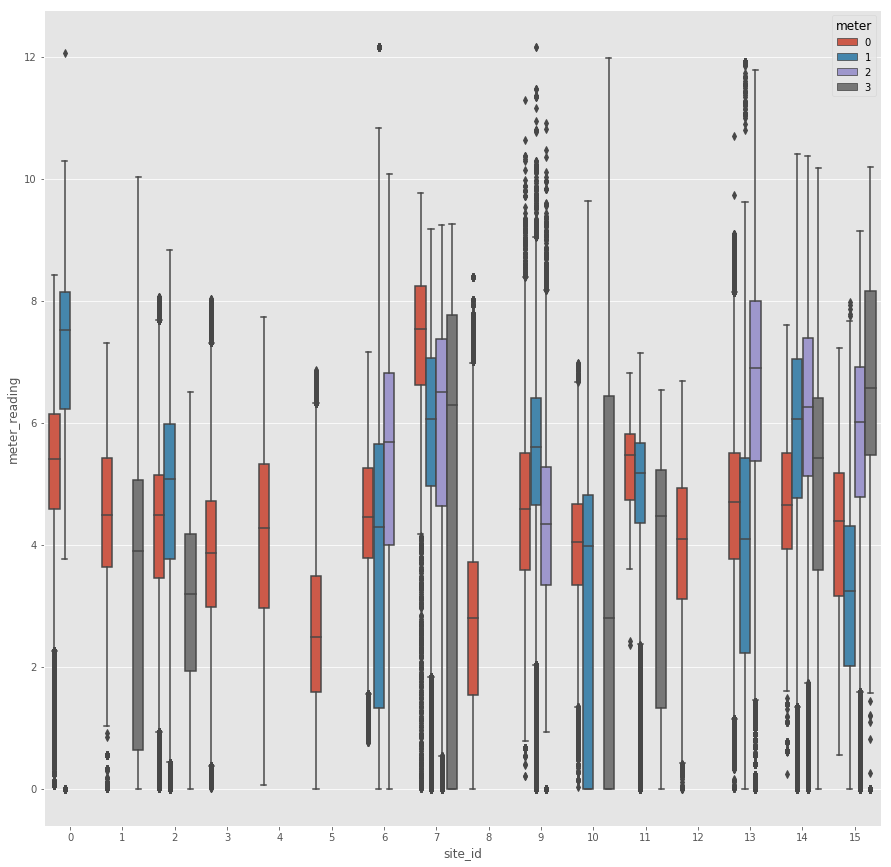

In [26]:
plt.figure(figsize=(15,15))
sns.boxplot(x=train['site_id'],y=train['meter_reading'],hue=train['meter'])

<Figure size 720x720 with 0 Axes>

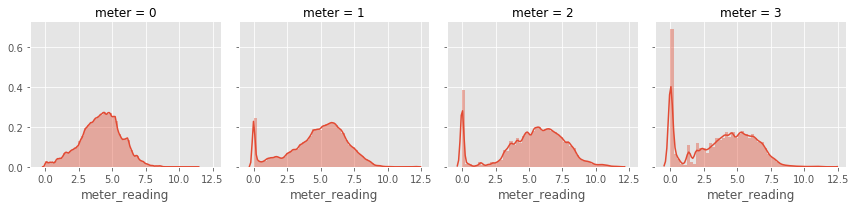

In [23]:
plt.figure(figsize=(10,10))
x = sns.FacetGrid(col='meter',data=train)
x.map(sns.distplot,'meter_reading')

In [24]:
train.groupby(['site_id']).apply(lambda x : x.isna().sum()) 

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,year,month,day,weekday,hour
site_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,723979,6,...,6,3,4394,23286,0,0,0,0,0,0
1,0,0,0,0,0,0,0,130381,0,1378,...,1378,536129,4474,1493,1317,0,0,0,0,0
2,0,0,0,0,0,0,0,561160,2367670,541,...,541,17982,12111,159372,1614,0,0,0,0,0
3,0,0,0,0,0,0,0,1234692,2366997,2161,...,2701,11070,43614,42309,2161,0,0,0,0,0
4,0,0,0,0,0,0,0,9510,0,82,...,253,112077,6303,8956,82,0,0,0,0,0
5,0,0,0,0,0,0,0,8784,0,2724,...,2724,773753,773753,28573,2811,0,0,0,0,0
6,0,0,0,0,0,0,0,595077,595077,813,...,813,125,11789,53048,2845,0,0,0,0,0
7,0,0,0,0,0,0,0,22880,0,5577,...,6350,276045,5857,5577,5577,0,0,0,0,0
8,0,0,0,0,0,0,0,541333,0,201,...,201,66,5312,15446,0,0,0,0,0,0
